#1. Understand the Business Problem
The dataset relates to the marketing campaigns of a Portuguese banking institution https://archive.ics.uci.edu/dataset/222/bank+marketing. The objective is to predict whether a client will subscribe to a term deposit (yes or no). Binary classification problem where the target variable is y (yes/no).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score #calculate the mean squared error between the true and predicted values in a regression problem.
from sklearn.datasets import make_regression #generate synthetic regression problem for testing

import matplotlib.pyplot as plt #plot graphs
import seaborn as sns #plot based on matpolit
sns.set()
%matplotlib inline 
#used in Jupyter notebooks to display Matplotlib plots inline.

# evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# classifier we will use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# model selection bits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve

# evaluation
from sklearn.metrics import f1_score

# plotting
#from plotting import plot_learning_curve, plot_validation_curve

print("Marketing Campaing Subscription Binary kick-off!")

Marketing Campaing Subscription Binary kick-off!


In [2]:
#CRISP-DM methodology
#is described in terms of a hierarchical process model, consisting of sets of tasks described at four levels of abstraction (from general to specific): 
    #1.Phase
    #2.Generic task
    #3. Specialized task
    #4.Process instance

In [3]:
#1. BUSINESS UNDERSTANDING
#Identify factors that influence the price of used cars and provide actionable insights to the dealership on what drives car valuation.

In [4]:
#2. DATA UNDERSTANDING
 #Initial data collection and proceeds with activities that enable to become familiar with the data
# Key Variables:
#2A. DATA MINING
#Prediction of car price
#When dealing wmarketing subscription if nominal and ordinal variables in exploratory data analysis (EDA) using Python, there are several algorithms and techniques you can employ to gain insights into the data

In [ ]:
#DATA COLLECTION
import pandas as pd #Load data in tabular format
campaingdf = pd.read_csv(r"Data Set\bank+marketing\bank\bank.csv") #Load the file from the specific folder. Note: Add an r before the file path string to treat it as a raw string, so the backslashes are not interpreted as escape characters.
#Note: pd.read_csv and not Excel. Replace the \ for /. If the file has ; but need , use sep= ';' to replace the ; for ,
#Add an r before the string to make it a raw string, which will treat backslashes as literal characters:

In [ ]:
#DATA COLLECTION
#df needs to be renamed for pandas to recognized it. Also, convertion of dta types from categorical to numerical is needed to allow deeper analysis.
#Adjusts CSV delimiter so the data can be read:
try:
    # Load the dataset with the correct delimiter
    campaign_df = pd.read_csv(r"Data Set\bank+marketing\bank\bank.csv", sep=';')  # Use raw string for file path
    print("Dataset loaded successfully!")
    print(campaign_df.info())  # Check the structure of the dataframe
    print(campaign_df.head())  # Preview the first few rows
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None
   age          job  marital  education default  balance housing 

In [6]:
#DATA COLLECTION
#Identify the library for the df:
type(campaign_df)

pandas.core.frame.DataFrame

In [7]:
#S T A T I S T I C S (EDA)
#Investigate the dataset for missing or problematic data.

In [46]:
#S T A T I S T I C S (EDA)
#view the column headers for df4
campaign_df.keys() 

#17 columns including the Y

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
#S T A T I S T I C S (EDA)
#EXPLORATORY DATA ANALYSIS (EDA) 
    #DESCRIPTIVE STATISTICS
    #Central Tedency and Dispersion
campaign_df.describe()

#NUmerical variables

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [9]:
#S T A T I S T I C S (EDA)
#Looking the data:
#View the first 5 columns of the df
campaign_df.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [49]:
#S T A T I S T I C S (EDA)
#Return the Mode: Use the value_counts() method in pandas to get the frequency count of each category in the nominal variable.
campaign_df.value_counts() 

age  job          marital  education  default  balance  housing  loan  contact   day  month  duration  campaign  pdays  previous  poutcome  y  
19   student      single   primary    no        103     no       no    cellular  10   jul    104       2         -1     0         unknown   yes    1
45   services     single   secondary  no        1757    yes      no    cellular  20   apr    1010      3          326   1         other     no     1
     technician   married  secondary  no        88      no       no    cellular  29   aug    150       2         -1     0         unknown   no     1
                                                49      no       no    cellular  29   jul    65        2         -1     0         unknown   no     1
                                               -149     yes      no    cellular  14   jul    287       2         -1     0         unknown   no     1
                                                                                                               

In [50]:
#S T A T I S T I C S (EDA)
#View information about the total counts of the data, range, data type, memory usage:
campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
#S T A T I S T I C S (EDA)
#Find duplicates in the df4 for each row True: Duplicate, False: Not duplicate:
campaign_df.duplicated()

#data does not have duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Length: 4521, dtype: bool

In [10]:
#3. DATA PREPARATION
#S T A T I S T I C S (EDA)
#To find the number of duplicates:
campaign_df.duplicated().sum()

#No diuplicates identified

0

In [ ]:
#EXPLORATORY DATA ANALYSIS (EDA)

# Count of duplicate rows
duplicate_count = campaign_df.duplicated().sum()

# Count of missing values
missing_values = campaign_df.isnull().sum()

print("Duplicate Rows Count:", duplicate_count)
print("Missing Values Count:")
print(missing_values)
# Missing values in these columns should be handled carefully, but duplicates were found.

Duplicate Rows Count: 0
Missing Values Count:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [12]:
campaign_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [13]:
#Assess the Importance of Each Column

#There are 16 features (ALL COLUMNS, EXCEPT Y THE TARGET VARIABLE), Target Variable: y (binary: "yes" or "no").

#Critical Columns:
    # Age: Influence the likelihood of subscription (e.g., younger vs. older demographics).
    # Job: Job type indicates financial stability and potential interest in term deposits.
    # Marital status: may affect financial goals and savings patterns.
    # Education level: may correlate with financial literacy and investment preferences.
    # Balance: Higher balance may indicate financial capability to subscribe to term deposits.
    # Housing: Owning a house could influence saving and investment behavior.
    # Loan:	Having an active loan might deter clients from subscribing to additional products.
    # Contact:	Communication type (e.g., cellular, telephone) may affect outreach effectiveness.
    # Duration:	Length of the last call is often a strong indicator of success (highly predictive).
    # Campaign:	Number of contacts during the current campaign can affect client behavior.
    # Pdays	Days: since the client was last contacted may influence response behavior.
    # Previous:	Number of contacts in previous campaigns indicates familiarity with the client.
    # poutcome:	Outcome of the previous campaign gives insights into the client’s past behavior.

#Less Critical Columns: 
    # Day:The specific day of the month might not have a significant impact on subscription likelihood.
    # Month: While the month may have some seasonal effects, it’s typically less critical compared to other variables.

#Predictor Columns: 
    # Duration: The length of the last contact is highly predictive, as longer conversations often indicate interest.
    # Poutcome: The result of the previous marketing campaign (e.g., success or failure) often correlates with current subscription likelihood.
    # Pdays: How recently the client was contacted might influence their likelihood to subscribe.
    # Campaign: The number of contacts during the current campaign could indicate either engagement or annoyance.
    # Balance: Higher balances often correlate with financial capability to subscribe.
    # Job and education: Socioeconomic factors like job and education level can indicate interest and capacity.
    # Housing and loan: Indicators of financial commitments that may influence decisions.

# Use correlation analysis and feature importance techniques (e.g., logistic regression coefficients, decision tree feature importance, or SHAP values) to validate and quantify the significance of features.
# Perform feature selection to include only the most impactful predictors in your model.


In [ ]:
#DEFINE Y and X
#Y = (target variable) whether the client subscribed to the term deposit "yes" or "no" at the moments this is a categorical variable
#X = (independent variable) All columns except the target variable (y). Include the critical columns at the moment X has a numerical data type

# Define the target variable (y) and features (X)
y = campaign_df['y']  # Target variable contains the values "yes" or "no". Represents whether the client subscribed to the term deposit.

X = campaign_df.drop(columns=['y'])  # Features (all columns except 'y') Includes columns in the CRITICAL section as like age, job, marital, etc.

# Verify the shapes and data
print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")
print(X.head())  # Display the first few rows of features
print(y.head())  # Display the first few values of the target variable

Shape of X (features): (4521, 16)
Shape of y (target): (4521,)
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  
0  cellular   19   oct        79         1     -1         0  unknown  
1  cellular   11   may       220         1    339         4  failure  
2  cellular   16   apr       185         1    330         1  failure  
3   unknown    3   jun       199         4     -1         0  unknown  
4   unknown    5   may       226         1     -1         0  unknown  
0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object


In [15]:
#ENCODE 
# Handling Categorical Variables
#Since the dataset contains categorical features (e.g., job, marital, education), need to encode them into numerical values before modeling. Popular methods include:

#One-Hot Encoding for nominal categories.
#Label Encoding for ordinal categories.

X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Encode target variable
le = LabelEncoder()
campaign_df['y'] = le.fit_transform(campaign_df['y'])

In [17]:
# Ensure target variable 'y' is encoded
le = LabelEncoder()
campaign_df['y'] = le.fit_transform(campaign_df['y'])  # 'yes' -> 1, 'no' -> 0

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# List the columns in X (features) and verify y
print("Columns in X (features):")
print(X.columns)

print("\nTarget variable (y):")
print(campaign_df['y'].name)

Columns in X (features):
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

Target variable (y):
y


In [18]:
#RESULTS:
# X
    # 42 columns after one-hot encoding
    #Numerical Features:
        #age, balance, day, duration, campaign, pdays, previous

    #Categorical Features (One-Hot Encoded):
        #Jobs: job_blue-collar, job_entrepreneur, ..., job_unknown
        #Marital status: marital_married, marital_single
        #Education: education_secondary, education_tertiary, education_unknown
        #Default status: default_yes
        #Housing loan: housing_yes
        #Personal loan: loan_yes
        #Contact type: contact_telephone, contact_unknown
        #Months: month_aug, month_dec, ..., month_sep
        #Previous campaign outcome: poutcome_other, poutcome_success, poutcome_unknown

# Y
    #is the target variable representing whether a client subscribed to a term deposit:
    #0: No
    #1: Yes

In [21]:
#ADDITIONAL ENCODING FOR BETTER ANALYSIS
# the correlation matrix calculation requires numerical data, but this dataset likely contains categorical variables that are still represented as strings (e.g., 'no', 'yes', job categories, etc.).
# To compute the correlation matrix, all columns in dataset must be numerical. SO do hot endcoding again. 

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Add the target variable to the encoded features
data_for_corr = X_encoded.copy()
data_for_corr['y'] = y  # Ensure 'y' is numeric (0 and 1)


In [22]:
print(data_for_corr.dtypes)  # Check data types

age                     int64
balance                 int64
day                     int64
duration                int64
campaign                int64
pdays                   int64
previous                int64
job_blue-collar          bool
job_entrepreneur         bool
job_housemaid            bool
job_management           bool
job_retired              bool
job_self-employed        bool
job_services             bool
job_student              bool
job_technician           bool
job_unemployed           bool
job_unknown              bool
marital_married          bool
marital_single           bool
education_secondary      bool
education_tertiary       bool
education_unknown        bool
default_yes              bool
housing_yes              bool
loan_yes                 bool
contact_telephone        bool
contact_unknown          bool
month_aug                bool
month_dec                bool
month_feb                bool
month_jan                bool
month_jul                bool
month_jun 

In [23]:
# Count total number of columns for X
total_columns = data_for_corr.shape[1]
print(f"Total number of columns: {total_columns}")

# Separate columns by type
numerical_cols = data_for_corr.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data_for_corr.select_dtypes(include=['uint8']).columns  # One-hot encoded categorical variables

# Display counts and lists of numerical and categorical columns
print(f"Number of numerical columns: {len(numerical_cols)}")
print(f"Numerical columns: {list(numerical_cols)}\n")

print(f"Number of categorical columns: {len(categorical_cols)}")
print(f"Categorical columns: {list(categorical_cols)}")


Total number of columns: 43
Number of numerical columns: 7
Numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Number of categorical columns: 0
Categorical columns: []


In [24]:
# Check the unique values in y after encoding
print("Unique values in y:", y.unique())

# Check the counts of each value in y
print("\nValue counts in y:")
print(y.value_counts())

# Display the first few rows of y to verify
print("\nFirst few rows of y:")
print(y.head())


Unique values in y: ['no' 'yes']

Value counts in y:
y
no     4000
yes     521
Name: count, dtype: int64

First few rows of y:
0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object


In [25]:
# Check for columns with non-numeric data
print(data_for_corr.dtypes)

# Identify unique values in 'y' or any problematic column
print(data_for_corr['y'].unique())  # Replace 'y' with other column names if needed


age                     int64
balance                 int64
day                     int64
duration                int64
campaign                int64
pdays                   int64
previous                int64
job_blue-collar          bool
job_entrepreneur         bool
job_housemaid            bool
job_management           bool
job_retired              bool
job_self-employed        bool
job_services             bool
job_student              bool
job_technician           bool
job_unemployed           bool
job_unknown              bool
marital_married          bool
marital_single           bool
education_secondary      bool
education_tertiary       bool
education_unknown        bool
default_yes              bool
housing_yes              bool
loan_yes                 bool
contact_telephone        bool
contact_unknown          bool
month_aug                bool
month_dec                bool
month_feb                bool
month_jan                bool
month_jul                bool
month_jun 

In [26]:
#Convert Target Column y to Numeric
#If y contains values like 'no' and 'yes', convert them as follows:
# Convert 'no' to 0 and 'yes' to 1 in the target variable
data_for_corr['y'] = data_for_corr['y'].replace({'no': 0, 'yes': 1})



C:\Users\Carmen\AppData\Local\Temp\ipykernel_21992\366654606.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_for_corr['y'] = data_for_corr['y'].replace({'no': 0, 'yes': 1})


In [27]:
#Convert All Non-Numeric Columns to Numeric
# Replace 'no'/'yes' in other columns if needed
for col in data_for_corr.select_dtypes(include=['object']).columns:
    print(f"Converting column: {col}")
    data_for_corr[col] = data_for_corr[col].replace({'no': 0, 'yes': 1})


In [95]:
# Convert bool Columns to Integers
# Convert all boolean columns to integers (True -> 1, False -> 0)
data_for_corr = data_for_corr.astype(int)


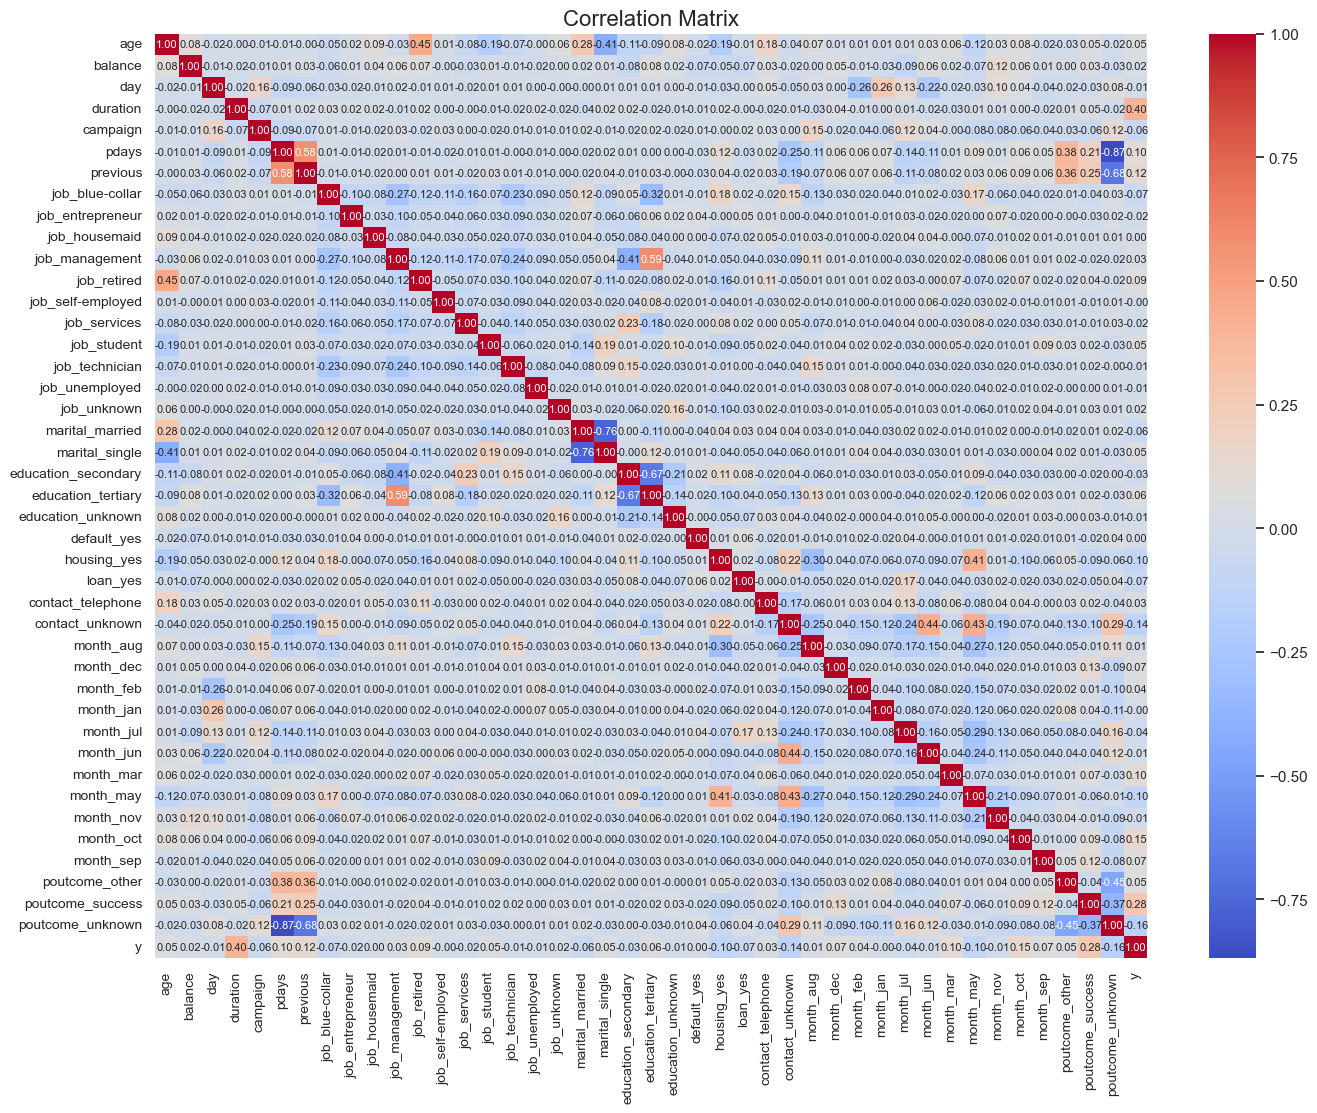

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = data_for_corr.corr()

# Plot the heatmap with smaller annotation font size
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    annot_kws={"size": 8}  # Adjust font size for annotations
)
plt.title('Correlation Matrix', fontsize=16)  # Adjust title font size
plt.xticks(fontsize=10)  # Adjust x-axis font size
plt.yticks(fontsize=10)  # Adjust y-axis font size
plt.show()



In [55]:
# Compute the correlation matrix
corr_matrix = data_for_corr.corr()

# Extract significant correlations with the target variable 'y'
threshold = 0.05  # this can be adjusted as needed
correlation_with_y = corr_matrix['y'].drop('y')  # Exclude correlation of 'y' with itself
significant_correlations = correlation_with_y[correlation_with_y.abs() > threshold].sort_values(ascending=False)

# Print significant correlations
print("Significant correlations with the target variable 'y':")
print(significant_correlations)


Significant correlations with the target variable 'y':
duration              0.401118
poutcome_success      0.283481
month_oct             0.145964
previous              0.116714
pdays                 0.104087
month_mar             0.102716
job_retired           0.086675
month_sep             0.071510
month_dec             0.069884
education_tertiary    0.056649
poutcome_other        0.051908
campaign             -0.061147
marital_married      -0.064643
job_blue-collar      -0.068147
loan_yes             -0.070517
month_may            -0.102077
housing_yes          -0.104683
contact_unknown      -0.139399
poutcome_unknown     -0.162038
Name: y, dtype: float64


In [ ]:
#Analysis:
#Critical Predictors: duration and poutcome_success are the most critical predictors for modeling. Focus on clients who had longer call durations and successful outcomes in previous campaigns.
#Seasonality: Subscription likelihood is influenced by certain months (e.g., October, March). Campaigns should be planned strategically during these periods.
#Demographics: Features like job_retired and education_tertiary positively impact subscription likelihood, while blue-collar jobs and housing loans have negative impacts.
#Campaign Efficiency: Too many contacts (campaign) or lack of prior success (poutcome_unknown) can decrease the likelihood of subscription.


Target Variable Distribution:
y
0    4000
1     521
Name: count, dtype: int64

Percentage Distribution:
y
0    88.476001
1    11.523999
Name: proportion, dtype: float64


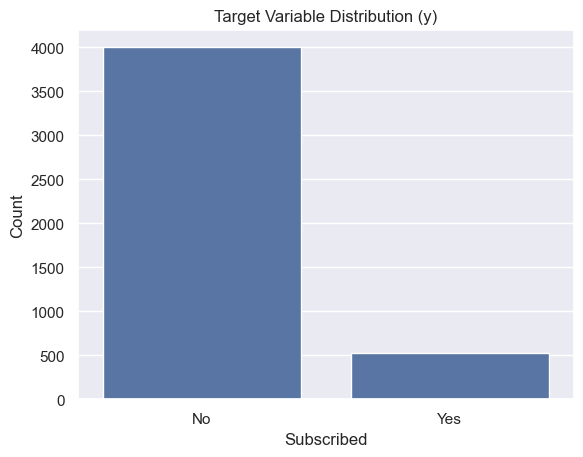

In [56]:
#VISUALIZATION
# Calculate total counts and percentages for each class
total_values = y.value_counts()
percentage_values = y.value_counts(normalize=True) * 100

# Print total values and percentages
print("Target Variable Distribution:")
print(total_values)
print("\nPercentage Distribution:")
print(percentage_values)

# Visualize the distribution of the target variable
sns.countplot(x=y)
plt.title('Target Variable Distribution (y)')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


Top 10 Features Correlated with Subscription (y):
duration              0.401118
poutcome_success      0.283481
month_oct             0.145964
previous              0.116714
pdays                 0.104087
month_mar             0.102716
job_retired           0.086675
month_sep             0.071510
month_dec             0.069884
education_tertiary    0.056649
Name: y, dtype: float64

Percentage Contribution of Top 10 Features:
duration              40.111830
poutcome_success      28.348088
month_oct             14.596376
previous              11.671444
pdays                 10.408682
month_mar             10.271568
job_retired            8.667484
month_sep              7.151025
month_dec              6.988431
education_tertiary     5.664925
Name: y, dtype: float64


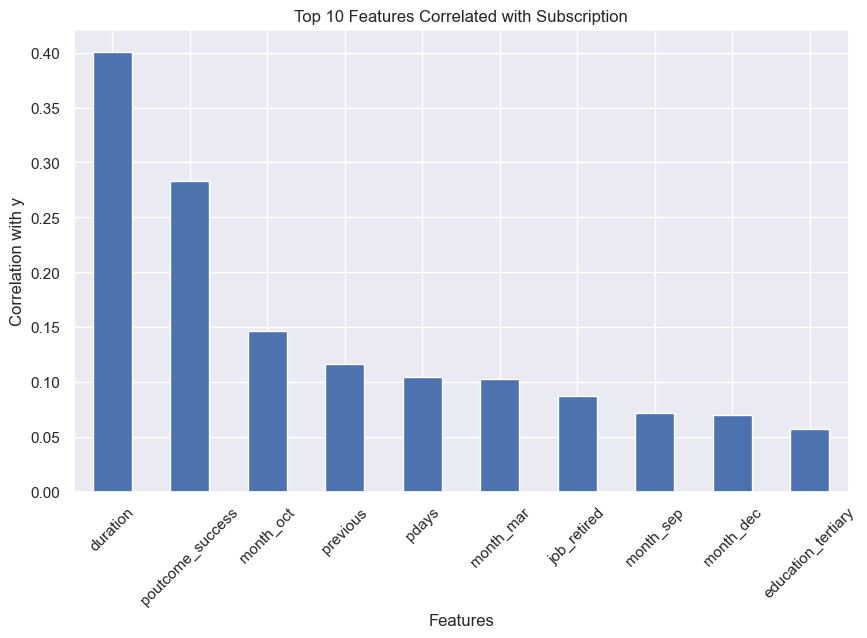

In [ ]:
#VISUALIZATION
# Sort features by correlation with y
top_corr_features = corr_matrix['y'].sort_values(ascending=False)

# Extract top 10 features (excluding 'y' itself)
top_10_features = top_corr_features[1:11]

# Calculate percentages (absolute correlation as a percentage of the strongest correlation)
percentage_contribution = (top_10_features.abs() / top_corr_features.abs().max()) * 100

# Print values and percentages
print("Top 10 Features Correlated with Subscription (y):")
print(top_10_features)
print("\nPercentage Contribution of Top 10 Features:")
print(percentage_contribution)

# Plot the top correlated features
top_10_features.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Features Correlated with Subscription')
plt.xlabel('Features')
plt.ylabel('Correlation with y')
plt.xticks(rotation=45)
plt.show()


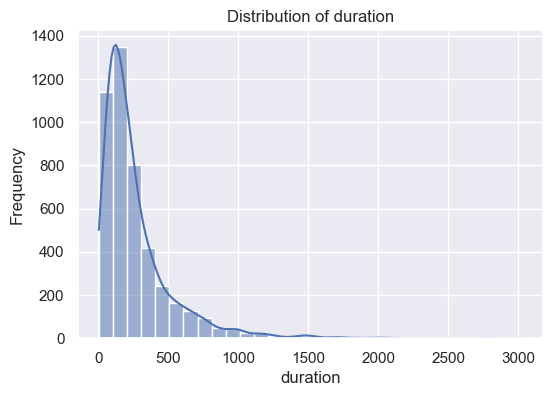

Values and Percentages for duration:
duration
4       1
5       9
6       2
7       6
8       9
       ..
2029    1
2087    1
2456    1
2769    1
3025    1
Name: count, Length: 875, dtype: int64
Percentages (%):
duration
4       0.022119
5       0.199071
6       0.044238
7       0.132714
8       0.199071
          ...   
2029    0.022119
2087    0.022119
2456    0.022119
2769    0.022119
3025    0.022119
Name: count, Length: 875, dtype: float64

---



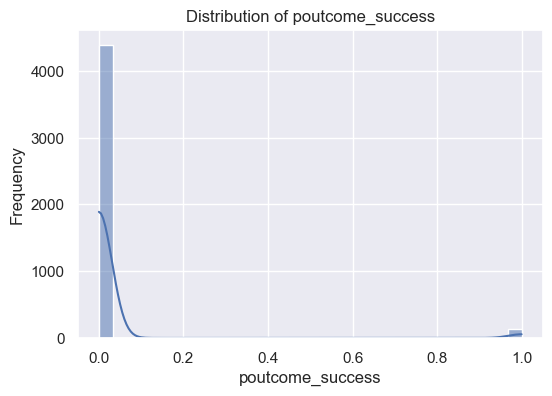

Values and Percentages for poutcome_success:
poutcome_success
False    4392
True      129
Name: count, dtype: int64
Percentages (%):
poutcome_success
False    97.146649
True      2.853351
Name: count, dtype: float64

---



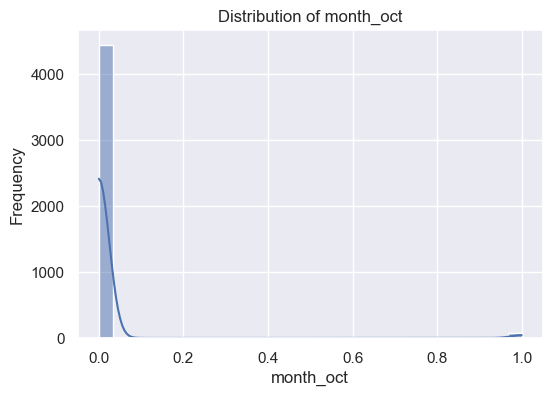

Values and Percentages for month_oct:
month_oct
False    4441
True       80
Name: count, dtype: int64
Percentages (%):
month_oct
False    98.23048
True      1.76952
Name: count, dtype: float64

---



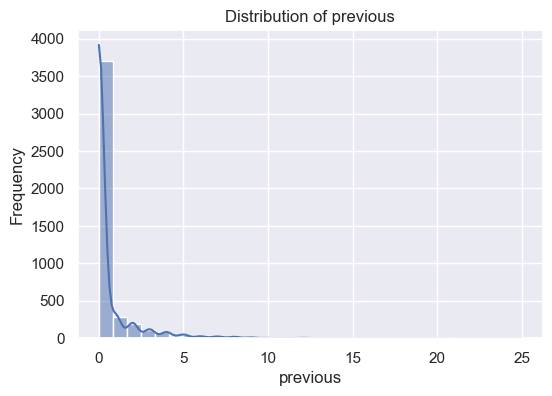

Values and Percentages for previous:
previous
0     3705
1      286
2      193
3      113
4       78
5       47
6       25
7       22
8       18
9       10
10       4
11       3
12       5
13       1
14       2
15       1
17       1
18       1
19       1
20       1
22       1
23       1
24       1
25       1
Name: count, dtype: int64
Percentages (%):
previous
0     81.950896
1      6.326034
2      4.268967
3      2.499447
4      1.725282
5      1.039593
6      0.552975
7      0.486618
8      0.398142
9      0.221190
10     0.088476
11     0.066357
12     0.110595
13     0.022119
14     0.044238
15     0.022119
17     0.022119
18     0.022119
19     0.022119
20     0.022119
22     0.022119
23     0.022119
24     0.022119
25     0.022119
Name: count, dtype: float64

---



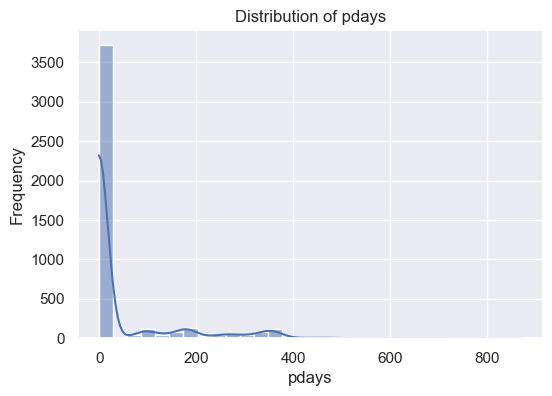

Values and Percentages for pdays:
pdays
-1      3705
 1         2
 2         7
 3         1
 5         1
        ... 
 687       1
 761       1
 804       1
 808       1
 871       1
Name: count, Length: 292, dtype: int64
Percentages (%):
pdays
-1      81.950896
 1       0.044238
 2       0.154833
 3       0.022119
 5       0.022119
          ...    
 687     0.022119
 761     0.022119
 804     0.022119
 808     0.022119
 871     0.022119
Name: count, Length: 292, dtype: float64

---



In [59]:
#VISUALIZATION
# Distribution of Key Numerical Features
# Visualize the distribution of features most correlated with y

# Select top numerical features based on correlation
key_features = top_corr_features[1:6].index  # Top 5 features excluding 'y'

# Plot the distribution for each key feature
for feature in key_features:
    plt.figure(figsize=(6, 4))
    
    # Plot histogram with KDE
    sns.histplot(data_for_corr[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    # Calculate and print values and percentages
    value_counts = data_for_corr[feature].value_counts().sort_index()
    percentages = (value_counts / value_counts.sum()) * 100
    
    print(f"Values and Percentages for {feature}:")
    print(value_counts)
    print("Percentages (%):")
    print(percentages)
    print("\n---\n")

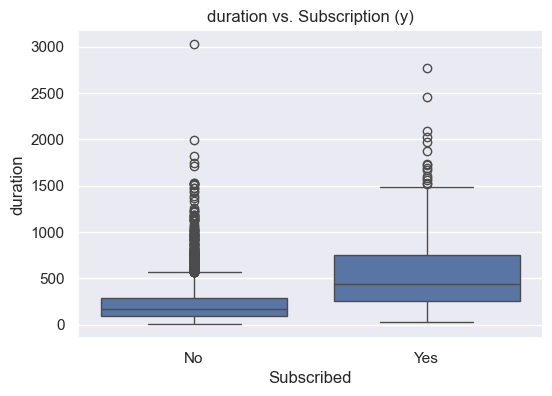

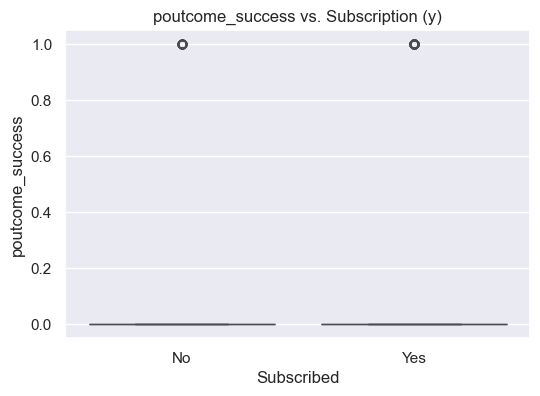

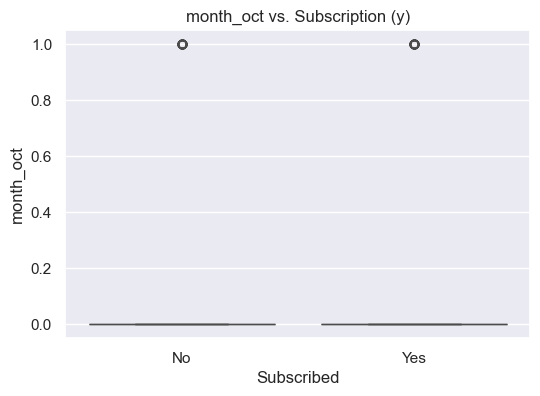

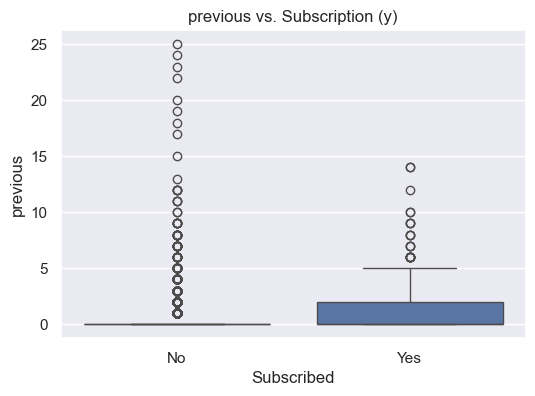

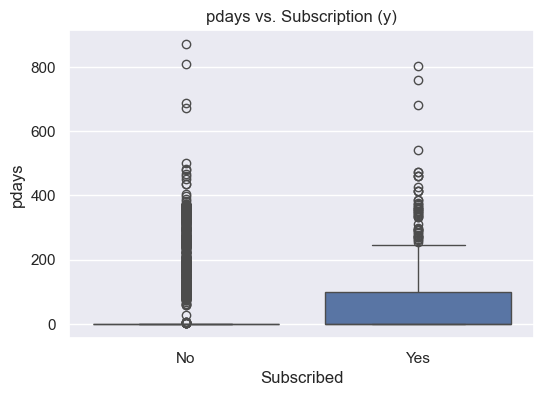

In [35]:

#VISUALIZATION
#Boxplots: Key Features vs. Target Variable
#Visualize how the top correlated features vary with y.
for feature in key_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='y', y=feature, data=data_for_corr)
    plt.title(f'{feature} vs. Subscription (y)')
    plt.xlabel('Subscribed')
    plt.ylabel(feature)
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
    plt.show()


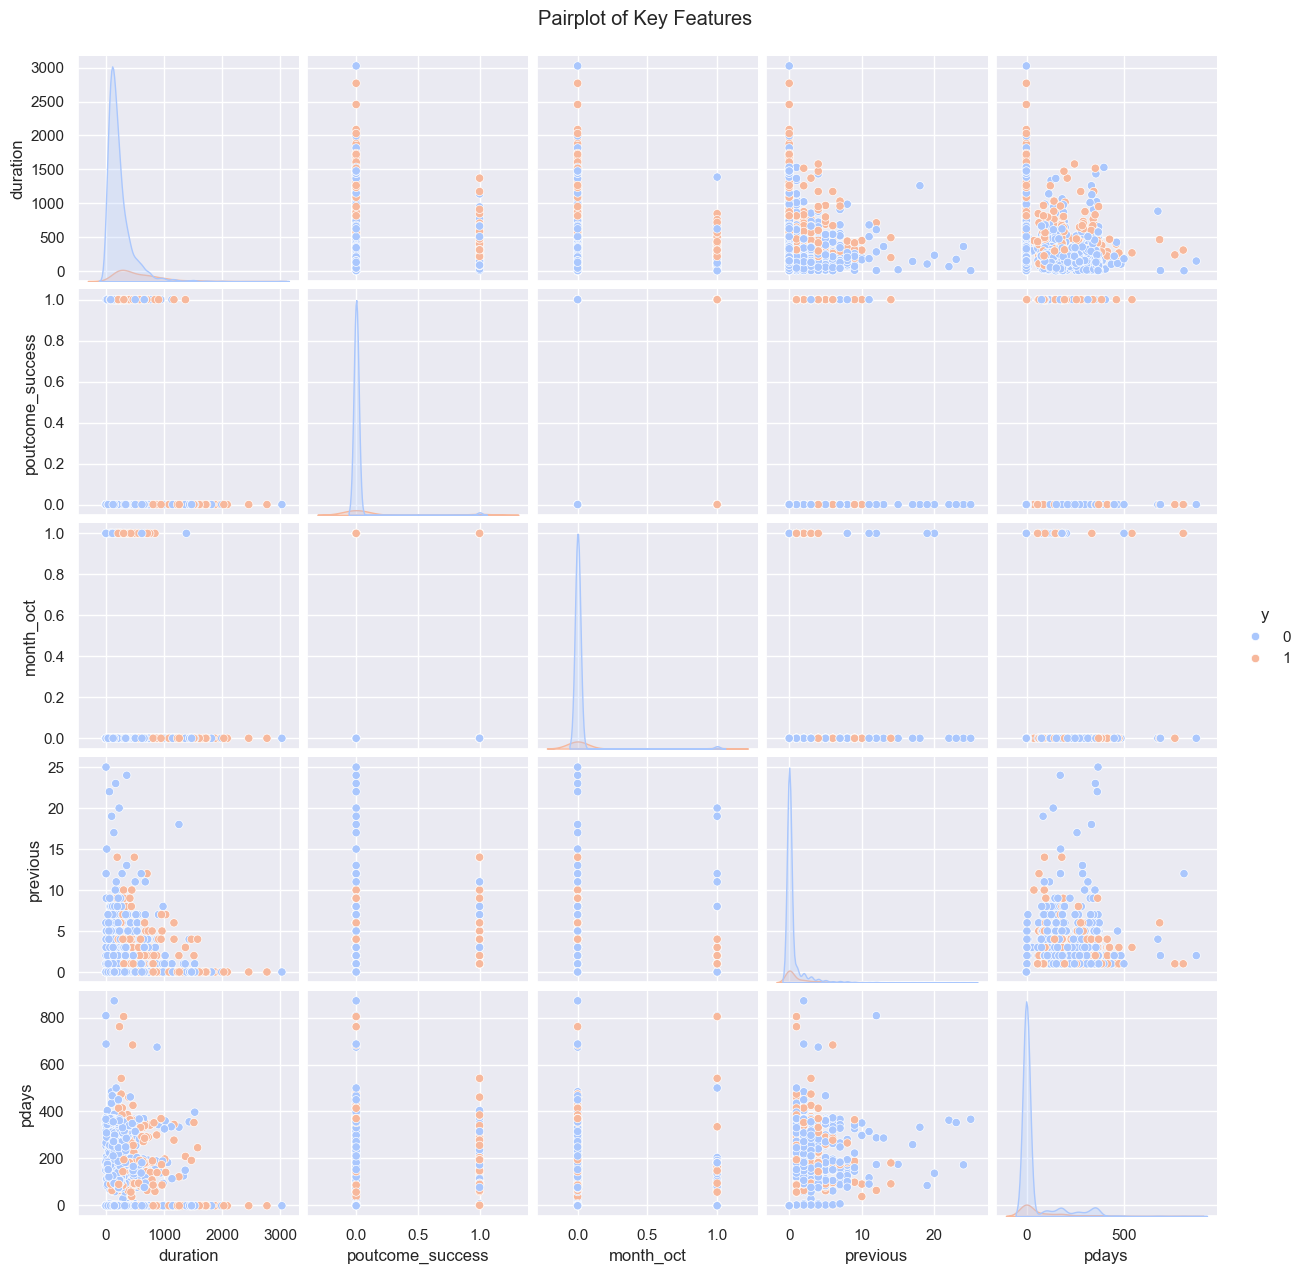

In [36]:
#VISUALIZATION
# #Pairplot of Key Features
#see pairwise relationships and how they relate to the target variable.
sns.pairplot(data_for_corr, vars=key_features, hue='y', palette='coolwarm', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()



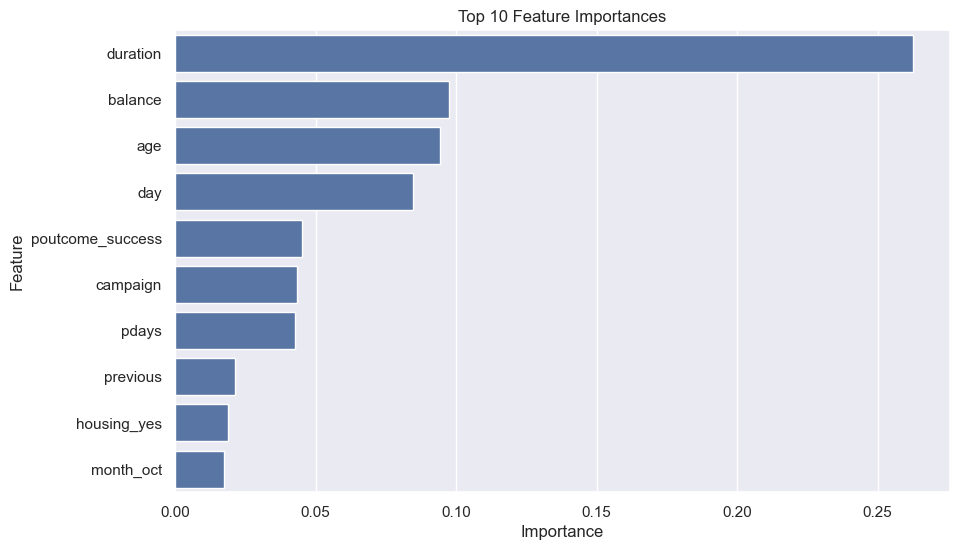

In [37]:
#Feature Importance Using Random Forest
#Visualize feature importance using a Random Forest model.

from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
X = data_for_corr.drop(columns=['y'])
y = data_for_corr['y']
rf_model.fit(X, y)

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [38]:
# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)



In [39]:
# Print feature importances for the graph Feature Importance Using Random Forest
print("Feature Importances from Random Forest:")
print(feature_importances)

Feature Importances from Random Forest:
                Feature  Importance
3              duration    0.262608
1               balance    0.097485
0                   age    0.094458
2                   day    0.084732
40     poutcome_success    0.045205
4              campaign    0.043271
5                 pdays    0.042791
6              previous    0.021444
24          housing_yes    0.018779
37            month_oct    0.017563
18      marital_married    0.016532
20  education_secondary    0.014300
21   education_tertiary    0.014286
27      contact_unknown    0.013736
28            month_aug    0.012163
10       job_management    0.011966
33            month_jun    0.011806
35            month_may    0.011411
15       job_technician    0.011318
34            month_mar    0.011141
19       marital_single    0.010704
25             loan_yes    0.010449
7       job_blue-collar    0.010160
36            month_nov    0.010079
32            month_jul    0.009663
30            month_feb 

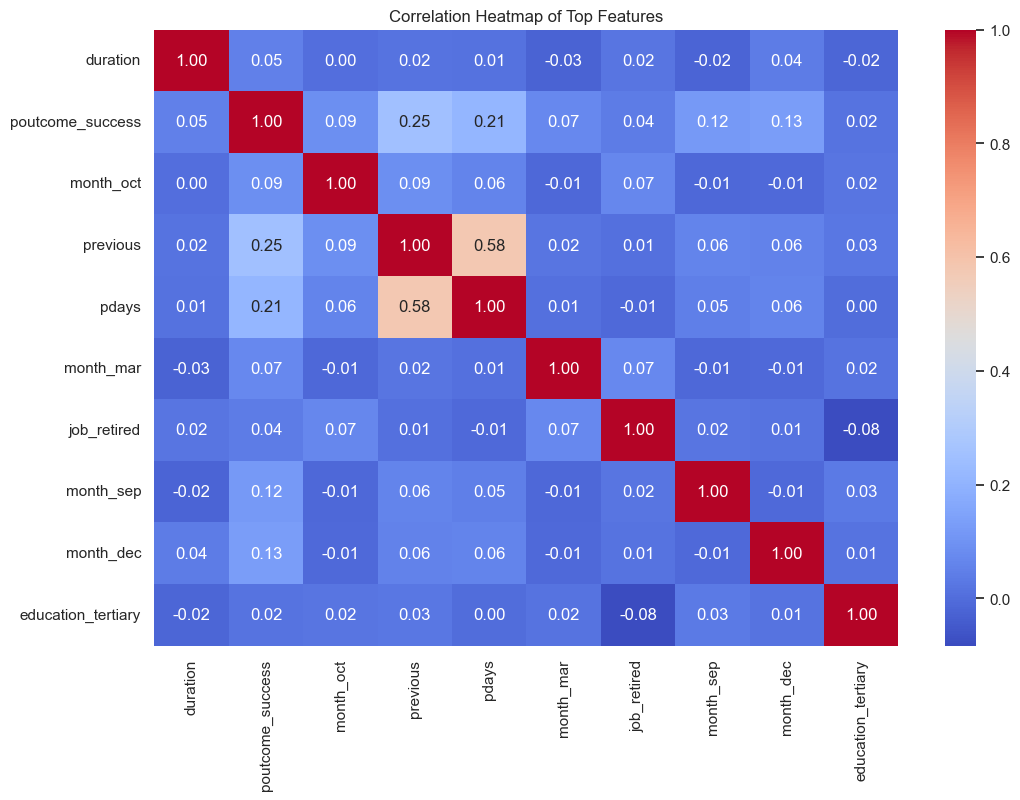

In [40]:
#VISUALIZATIONS
#Heatmap of Top Correlated Features
#Visualize the relationships among the top 10 features correlated with y.

# Select top 10 features most correlated with y
top_features = top_corr_features[1:11].index  # Exclude 'y'

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_for_corr[top_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Top Features')
plt.show()



In [41]:
# Print correlation matrix values
# Compute the correlation matrix
corr_matrix = data_for_corr.corr()

# Extract correlation of each feature with the target variable 'y'
corr_with_target = corr_matrix['y'].sort_values(ascending=False)

# Print sorted correlations with the target variable
print("Correlation of Features with Target Variable (y):")
print(corr_with_target)

Correlation of Features with Target Variable (y):
y                      1.000000
duration               0.401118
poutcome_success       0.283481
month_oct              0.145964
previous               0.116714
pdays                  0.104087
month_mar              0.102716
job_retired            0.086675
month_sep              0.071510
month_dec              0.069884
education_tertiary     0.056649
poutcome_other         0.051908
job_student            0.047809
marital_single         0.045815
age                    0.045092
month_feb              0.039805
job_management         0.032634
contact_telephone      0.025878
job_unknown            0.019886
balance                0.017905
month_aug              0.012084
job_housemaid          0.004872
default_yes            0.001303
job_self-employed     -0.003827
month_jan             -0.004109
job_unemployed        -0.007312
education_unknown     -0.008870
job_technician        -0.010154
day                   -0.011244
month_jun             

In [42]:
#DROPPIN GCOLUMNS BEFORE MODELING

#To build a more efficient and effective model, it's essential to drop features that are either:
    #Not strongly correlated with the target variable (y).
    #Low in feature importance according to the Random Forest analysis.
    #Highly correlated with other features, which can lead to multicollinearity

#Threshold for Correlation with y:
        #Features with very low absolute correlation (e.g., |correlation| < 0.05) are unlikely to contribute significantly to predicting y.
        #default_yes (correlation: 0.001303)
        #job_self-employed (correlation: -0.003827)
        #housing_yes (correlation: -0.104683)
        #contact_unknown (correlation: -0.139399)
        #poutcome_unknown (correlation: -0.162038)
#Threshold for Feature Importance:
    #Features with extremely low importance (e.g., importance < 0.01 in Random Forest) can be removed as they have minimal predictive power.
        #default_yes
        #job_housemaid
        #month_aug

#Domain Knowledge or Redundancy:
    #Drop features that are logically redundant or have unclear relationships with the target (e.g., multiple highly correlated time-based features).

In [43]:
#Final Features to Drop: Combine insights from both methods:
drop_features = [
    'default_yes',
    'job_self-employed',
    'housing_yes',
    'contact_unknown',
    'poutcome_unknown',
    'job_housemaid',
    'month_aug'
]

In [44]:
#Updated Dataset for Modeling
#Drop the selected features and proceed with the remaining features for modeling:
# Drop less relevant features
X_cleaned = X.drop(columns=drop_features)

# Verify the shape of the dataset
print(f"Shape of X before dropping: {X.shape}")
print(f"Shape of X after dropping: {X_cleaned.shape}")


Shape of X before dropping: (4521, 42)
Shape of X after dropping: (4521, 35)


In [45]:
#MODEL, BUILDING AND EVALUATION
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [46]:
#Prepare the Data
#Split the cleaned dataset into training and testing sets for model evaluation.
    # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42)

# Verify the shapes of the splits
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

    

Training set shape: (3616, 35), Testing set shape: (905, 35)


In [47]:
#Define and Train Models
#We will train four classifiers: KNN, Logistic Regression, Decision Tree, and SVM.
# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True)
}

# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Store results
    results.append({"Model": name, "Accuracy": accuracy})



Training KNN...

KNN Evaluation:
Accuracy: 0.8773480662983425
Confusion Matrix:
 [[770  37]
 [ 74  24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       807
           1       0.39      0.24      0.30        98

    accuracy                           0.88       905
   macro avg       0.65      0.60      0.62       905
weighted avg       0.86      0.88      0.86       905


Training Logistic Regression...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Evaluation:
Accuracy: 0.8994475138121547
Confusion Matrix:
 [[786  21]
 [ 70  28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       807
           1       0.57      0.29      0.38        98

    accuracy                           0.90       905
   macro avg       0.74      0.63      0.66       905
weighted avg       0.88      0.90      0.88       905


Training Decision Tree...

Decision Tree Evaluation:
Accuracy: 0.8629834254143647
Confusion Matrix:
 [[742  65]
 [ 59  39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       807
           1       0.38      0.40      0.39        98

    accuracy                           0.86       905
   macro avg       0.65      0.66      0.65       905
weighted avg       0.87      0.86      0.86       905


Training SVM...

SVM Evaluation:
Accuracy: 0.8906077348066298
Confus

In [48]:
#Compare Model Performance
#Aggregate the results into a DataFrame for easy comparison.

# Create a DataFrame for results
results_df = pd.DataFrame(results)
print("\nModel Performance:")
print(results_df)

    


Model Performance:
                 Model  Accuracy
0                  KNN  0.877348
1  Logistic Regression  0.899448
2        Decision Tree  0.862983
3                  SVM  0.890608


In [49]:
# Best-Performing Model
#From the accuracy results:
    #Logistic Regression achieved the highest accuracy (89.94%) among the four models.
#Insights from Results
    #KNN (87.73%) and SVM (89.06%) also performed well, showing that the data might have some non-linear relationships that these models can capture.
    #Decision Tree (87.07%) performed slightly worse, possibly due to overfitting or suboptimal splitting criteria.

In [50]:
#Hyperparameter Tuning:

#Use GridSearchCV to optimize parameters for Logistic Regression, KNN, SVM, and Decision Tree.
#Example for SVM
#from sklearn.model_selection import GridSearchCV

# Parameter grid for SVM
#param_grid = {
    #'C': [0.1, 1, 10],
    #'kernel': ['linear', 'rbf'],
    #'gamma': [1, 0.1, 0.01]
#}

#grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
#grid.fit(X_train, y_train)

#print("Best Parameters for SVM:", grid.best_params_)
#print("Best Accuracy for SVM:", grid.best_score_)
#Note: I used this one and it did not complete in an hour, changing it to LR

In [ ]:
#Hyperparameter Tuning for Logistic Regression
#Logistic Regression is generally faster than SVM, especially for large datasets.
    
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solvers for optimization
}

# GridSearch for Logistic Regression
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters for Logistic Regression:", grid.best_params_)
print("Best Accuracy for Logistic Regression:", grid.best_score_)


print("Starting hyperparameter tuning for Logistic Regression...")
grid.fit(X_train, y_train)
print("Hyperparameter tuning completed.")

##Analysis
#Logistic Regression
    #Best Accuracy (89.94%) among all models.
    #Logistic Regression assumes a linear relationship between the features and the log-odds of the target variable. 
    # This suggests that the relationships in the data are well-modeled with a linear approach.
    #Advantages:
       #Simple and interpretable.
        #Faster to train and tune than complex models like SVM or Decision Trees.
        #Works well when relationships in the data are mostly linear.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best Parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best Accuracy for Logistic Regression: 0.902100288087542
Starting hyperparameter tuning for Logistic Regression...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Hyperparameter tuning completed.


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
#Hyperparameter Tuning for K-Nearest Neighbors (KNN)
#KNN has fewer hyperparameters, making it quicker to tune.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting function
    'metric': ['euclidean', 'manhattan'],  # Distance metric
}

# GridSearch for KNN
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters for KNN:", grid.best_params_)
print("Best Accuracy for KNN:", grid.best_score_)

#Note: This is my recommended method KNN it was faster to execute compare to SVM or LG under 15 seconds
#K-Nearest Neighbors (KNN)
    #Accuracy: 88.16%.
    #KNN is simple and works well for small datasets with clear clusters.
    #The chosen parameters (n_neighbors=9, metric='euclidean') indicate that a moderate neighborhood size balances between bias and variance.
    #Advantages:
        #Non-parametric (no assumptions about data distribution).
        #Can model complex relationships.
    #Disadvantage:
        #Computationally expensive for large datasets (requires calculating distances for every query point).
        #Lower accuracy compared to Logistic Regression and Decision Trees.
    


Best Parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best Accuracy for KNN: 0.8816372847940211


In [54]:
#Hyperparameter Tuning for Decision Tree
#Decision Trees are simpler models and typically tune faster than SVM.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criteria
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
}

# GridSearch for Decision Tree
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters for Decision Tree:", grid.best_params_)
print("Best Accuracy for Decision Tree:", grid.best_score_)

#Note: This DT was really fast as well to be xecuted under 16 seconds

#Decision Tree
    #Accuracy: 89.38% (slightly below Logistic Regression).
    #Decision Trees can model non-linear relationships, which makes them useful when data has complex interactions.
    #The chosen parameters (entropy, max_depth=5, etc.) suggest a pruned tree to avoid overfitting.
    #Advantages:
       #Easy to interpret.
        #Handles non-linearity and feature interactions well.
    #Disadvantage:
        #Slightly less accurate than Logistic Regression, potentially due to limited tree depth (5).


Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Accuracy for Decision Tree: 0.893806117848437


In [ ]:
#RESULTS
# Based on the provided results and hyperparameter tuning outcomes, the analysis of the models is:

#Model	                           Best Parameters	                                                   Accuracy (%)
    #Decision Tree	{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}	89.38
    #K-Nearest Neighbors (KNN)	{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}	88.16
    #Logistic Regression	{'C': 1, 'solver': 'lbfgs'}	89.94



#Model Recommendation
        #Logistic Regression is the best choice for this dataset based on:

#The highest accuracy (89.94%).
#Simplicity and interpretability.
#Faster training and evaluation compared to other models.
#If interpretability is less important and capturing non-linear relationships is a priority, Decision Tree could be an alternative, with only a marginal accuracy trade-off (89.38%).

#Recommendations
    #Based on the findings:

#Feature Importance:
    #duration and poutcome_success are critical predictors.
    #Focus marketing efforts on clients with a history of successful interactions and longer call durations.
#Leverage Simplicity:
    #Logistic Regression provides an interpretable model to communicate results to stakeholders.
#Efficiency in Deployment:
    #Logistic Regression models are lightweight and can be deployed in real-time systems for predictions.

#Next Steps
    #Finalize Logistic Regression as the primary model.
    #Optionally, explore ensemble methods (e.g., Random Forest) for further improvement.

In [ ]:
#Step 7: Create a Jupyter Notebook Report
#Include the following:

#Introduction: Briefly describe the problem and dataset.
#EDA: Present key insights from exploratory analysis.
#Preprocessing: Explain steps like encoding, scaling, and class balancing.
#Model Training: Showcase results of each classifier with metrics.
#Conclusion: Provide actionable insights and recommendations for the bank.
